In [1]:
import pandas as pd
import numpy as np
import csv

import requests
from io import StringIO

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

# problem B

## no misssing value

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00510/Grisoni_et_al_2016_EnvInt88.csv'
df = pd.read_csv(StringIO(requests.get(url).content.decode('utf-8')))
df = df.drop(columns = 'CAS')
df = df.drop(columns = 'SMILES')
df = df.drop(columns = 'logBCF')

In [4]:
df.isnull().sum()

Set         0
nHM         0
piPC09      0
PCD         0
X2Av        0
MLOGP       0
ON1V        0
N-072       0
B02[C-N]    0
F04[C-O]    0
Class       0
dtype: int64

In [5]:
df

,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class
0,Train,0,0.000,1.49,0.14,1.35,0.72,0,1,5,1
1,Train,0,0.000,1.47,0.14,1.70,0.88,0,1,5,1
2,Train,0,0.000,1.20,0.25,4.14,2.06,0,0,0,3
3,Train,0,0.000,1.69,0.13,1.89,0.79,0,1,8,3
4,Train,0,0.000,0.52,0.25,2.65,1.31,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
774,Train,2,0.000,1.48,0.17,2.57,0.73,0,1,4,1
775,Test,1,6.564,2.37,0.16,3.77,2.28,0,1,3,2
776,Train,0,0.000,1.71,0.13,1.89,0.79,0,1,8,1
777,Test,0,0.000,1.19,0.21,2.81,1.69,0,0,1,3


In [4]:
df.iloc[:,1:-1] = df.iloc[:,1:-1]/df.iloc[:,1:-1].max() # rescale arrtibutes

In [5]:
df['Class'] = df['Class']-1

## split data

In [7]:
X = df.iloc[:,:-1].drop(columns = 'Set')
y = df.iloc[:,-1]
X_train = df.loc[df['Set'] == 'Train'].iloc[:,1:-1]
X_test = df.loc[df['Set'] == 'Test'].iloc[:,1:-1]
y_train = df.loc[df['Set']=='Train'].iloc[:,-1]
y_test = df.loc[df['Set'] == 'Test'].iloc[:,-1]
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [8]:
df = df.drop(columns = 'Set')

In [9]:
attributes = list(df.columns.values)
X_train

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O]
0,0.000000,0.000000,0.252542,0.062780,0.162260,0.100139,0.000000,1.0,0.20
1,0.000000,0.000000,0.249153,0.062780,0.204327,0.122392,0.000000,1.0,0.20
2,0.000000,0.000000,0.203390,0.112108,0.497596,0.286509,0.000000,0.0,0.00
3,0.000000,0.000000,0.286441,0.058296,0.227163,0.109875,0.000000,1.0,0.32
4,0.000000,0.000000,0.088136,0.112108,0.318510,0.182197,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...
579,0.250000,0.235831,0.038983,0.188341,0.076923,0.326843,0.333333,1.0,0.28
580,0.000000,0.000000,0.254237,0.067265,0.227163,0.101530,0.000000,1.0,0.16
581,0.000000,0.000000,0.252542,0.071749,0.269231,0.127955,0.000000,1.0,0.16
582,0.166667,0.000000,0.250847,0.076233,0.308894,0.101530,0.000000,1.0,0.16


In [10]:
N, P = X_train.shape

## Cross Validation

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0.6418781390430874, 0.6341395717684377, 0.6495770552471583, 0.6585249801744647, 0.6508194554586307, 0.6456449907480836, 0.630253766851705, 0.6315424266455194, 0.6238501189532117, 0.6289651070578905, 0.6110163891091727, 0.6174134284959027, 0.6032844303462861, 0.6033174729051018, 0.5968807824477929, 0.5891752577319587, 0.5917525773195876, 0.5943166798836903, 0.5956053396775047, 0.5943166798836903]


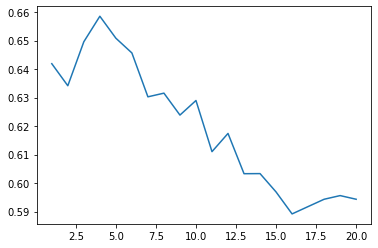

when depth = 4 the best accuracy is 0.6585249801744647


In [12]:
%matplotlib inline 
from sklearn.model_selection import cross_val_score

score_list = []
depths = []

for dep in range(1,21):
    depths.append(dep)
    clf_cross = DecisionTreeClassifier(
        max_depth = dep, max_leaf_nodes = 2**dep, random_state = 7021)
    scores = cross_val_score(clf_cross, X, y, cv=4)
    score_list.append(scores.mean())

print(depths,score_list)

plt.plot(depths,score_list)
plt.show()

print("when depth =",score_list.index(max(score_list))+1, 'the best accuracy is',max(score_list))

## CART

<IPython.core.display.Javascript object>


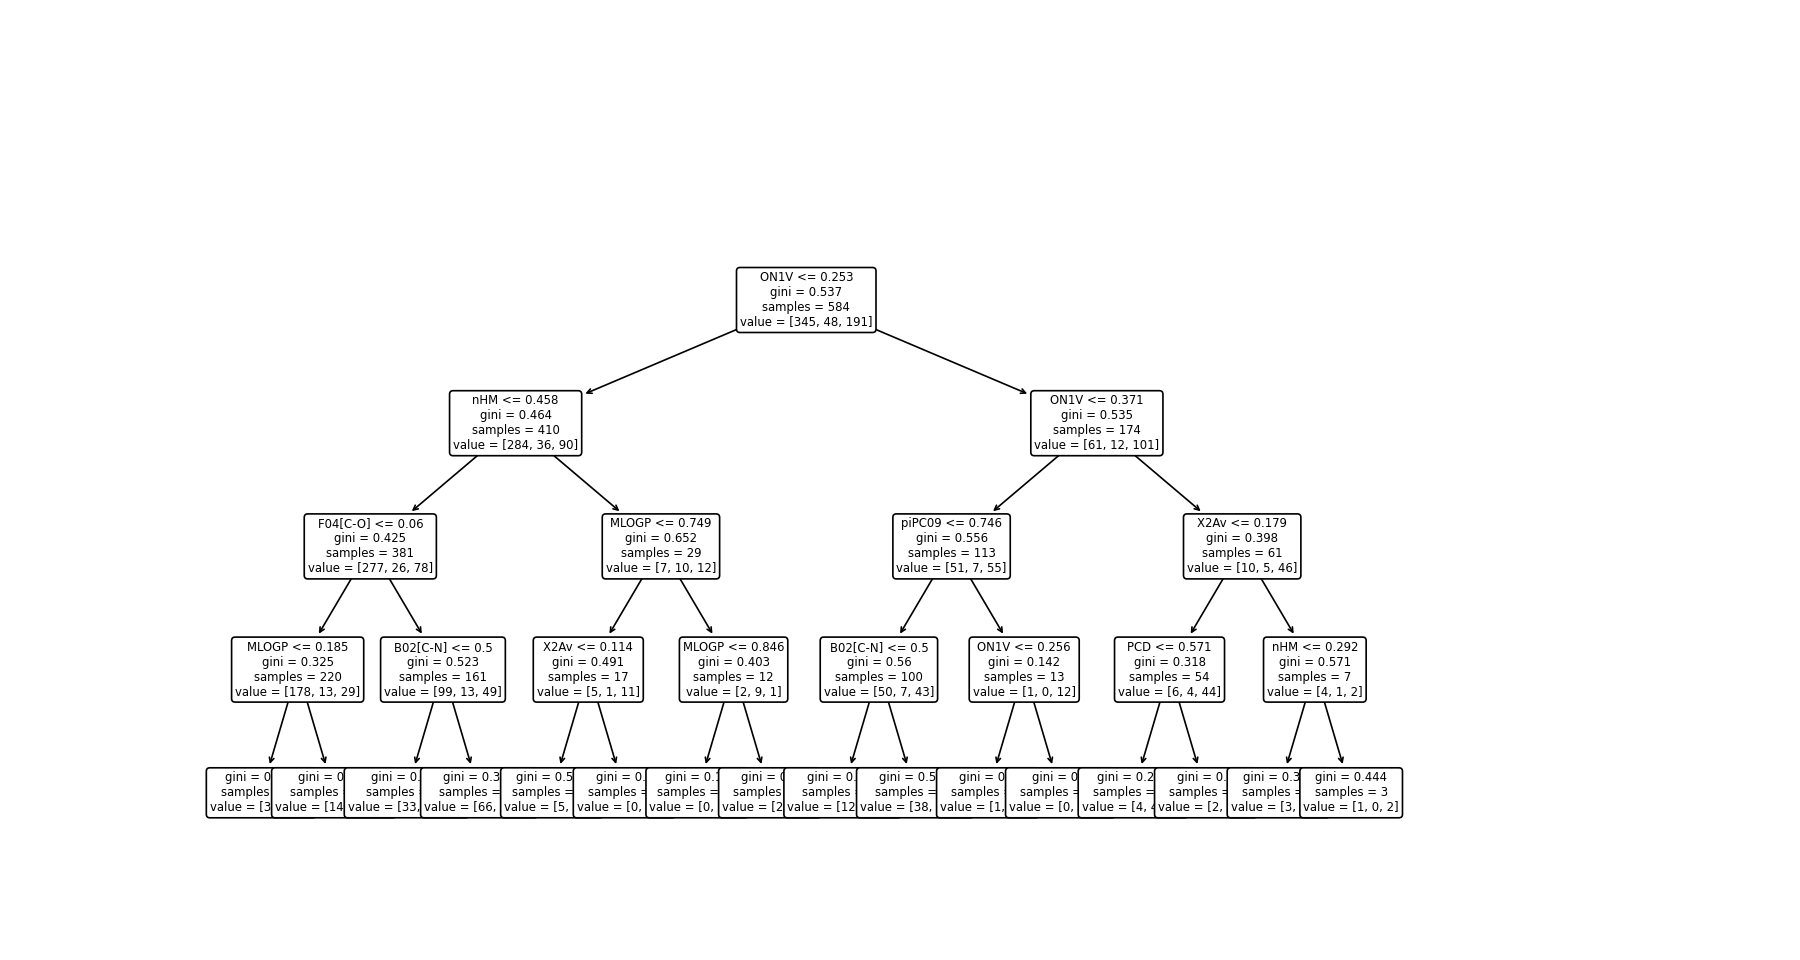

In [11]:
depth = 4
clf = DecisionTreeClassifier(
        max_depth = depth, max_leaf_nodes = 2**depth, random_state = 7021,ccp_alpha=0)
clf.fit(X_train, y_train)
fig = plt.figure(figsize = (15, 8))
_ = plot_tree(
    clf, filled = False, fontsize = 7, rounded = True, 
    feature_names = list(df.columns.values))
fig.savefig('CART.png')

In [12]:
print(export_text(clf, feature_names = attributes[0:-1]))

|--- ON1V <= 0.25
|   |--- nHM <= 0.46
|   |   |--- F04[C-O] <= 0.06
|   |   |   |--- MLOGP <= 0.19
|   |   |   |   |--- class: 0
|   |   |   |--- MLOGP >  0.19
|   |   |   |   |--- class: 0
|   |   |--- F04[C-O] >  0.06
|   |   |   |--- B02[C-N] <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- B02[C-N] >  0.50
|   |   |   |   |--- class: 0
|   |--- nHM >  0.46
|   |   |--- MLOGP <= 0.75
|   |   |   |--- X2Av <= 0.11
|   |   |   |   |--- class: 2
|   |   |   |--- X2Av >  0.11
|   |   |   |   |--- class: 2
|   |   |--- MLOGP >  0.75
|   |   |   |--- MLOGP <= 0.85
|   |   |   |   |--- class: 1
|   |   |   |--- MLOGP >  0.85
|   |   |   |   |--- class: 0
|--- ON1V >  0.25
|   |--- ON1V <= 0.37
|   |   |--- piPC09 <= 0.75
|   |   |   |--- B02[C-N] <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- B02[C-N] >  0.50
|   |   |   |   |--- class: 0
|   |   |--- piPC09 >  0.75
|   |   |   |--- ON1V <= 0.26
|   |   |   |   |--- class: 0
|   |   |   |--- ON1V >  0.26
|   |   |   |   |---

In [13]:
def find_path(root, path, x, children_left, children_right):
    path.append(root)
    if root == x:
        return True
    left = False
    right = False
    if (children_left[root] != -1):
        left = find_path(children_left[root], path, x, children_left, children_right)
    if (children_right[root] != -1):
        right = find_path(children_right[root], path, x, children_left, children_right)
    if left or right:
        return True
    path.remove(root)
    return False

def get_rule(path, children_left, attributes, feature, threshold):
    mask = ''
    for idx, node in enumerate(path):
        # filter out the leaf node
        if idx != len(path) - 1:
            # left or right branch node
            if (children_left[node] == path[idx + 1]):
                mask += "('{}' <= {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
            else:
                mask += "('{}' > {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "").strip()
    return mask

In [14]:
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [15]:
leaf_id = np.unique(clf.apply(X_train))

paths = {}
for leaf in leaf_id:
    path_leaf = []
    find_path(0, path_leaf, leaf, children_left, children_right)
    paths[leaf] = path_leaf

CART_rules = {}
for leaf in paths:
    CART_rules[leaf] = get_rule(paths[leaf], children_left, attributes[0:-1], feature, threshold)

### rules of CART

In [16]:
CART_rules

{7: "('ON1V' <= 0.25) & ('nHM' <= 0.46) & ('F04[C-O]' > 0.06) & ('B02[C-N]' <= 0.50)",
 8: "('ON1V' <= 0.25) & ('nHM' <= 0.46) & ('F04[C-O]' > 0.06) & ('B02[C-N]' > 0.50)",
 17: "('ON1V' <= 0.25) & ('nHM' > 0.46) & ('MLOGP' > 0.75) & ('MLOGP' <= 0.85)",
 18: "('ON1V' <= 0.25) & ('nHM' > 0.46) & ('MLOGP' > 0.75) & ('MLOGP' > 0.85)",
 19: "('ON1V' > 0.25) & ('ON1V' > 0.37) & ('X2Av' <= 0.18) & ('PCD' <= 0.57)",
 20: "('ON1V' > 0.25) & ('ON1V' > 0.37) & ('X2Av' <= 0.18) & ('PCD' > 0.57)",
 21: "('ON1V' > 0.25) & ('ON1V' <= 0.37) & ('piPC09' <= 0.75) & ('B02[C-N]' <= 0.50)",
 22: "('ON1V' > 0.25) & ('ON1V' <= 0.37) & ('piPC09' <= 0.75) & ('B02[C-N]' > 0.50)",
 23: "('ON1V' > 0.25) & ('ON1V' <= 0.37) & ('piPC09' > 0.75) & ('ON1V' <= 0.26)",
 24: "('ON1V' > 0.25) & ('ON1V' <= 0.37) & ('piPC09' > 0.75) & ('ON1V' > 0.26)",
 25: "('ON1V' <= 0.25) & ('nHM' > 0.46) & ('MLOGP' <= 0.75) & ('X2Av' <= 0.11)",
 26: "('ON1V' <= 0.25) & ('nHM' > 0.46) & ('MLOGP' <= 0.75) & ('X2Av' > 0.11)",
 27: "('ON1V

In [17]:
initial_a = np.array([i for i in clf.tree_.feature if i != -2])
initial_a

array([5, 0, 5, 8, 4, 4, 7, 1, 3, 3, 4, 7, 5, 2, 0], dtype=int64)

In [18]:
initial_b = np.array([i for i in clf.tree_.threshold if i != -2])
initial_b

array([0.25312935, 0.45833333, 0.37065369, 0.06      , 0.74939904,
       0.18509615, 0.5       , 0.7462967 , 0.1793722 , 0.11434978,
       0.84615386, 0.5       , 0.25591099, 0.57118642, 0.29166667])

### in-sample accuracy of CART

In [19]:
clf.score(X_train, y_train)

0.726027397260274

### out-of-sample accuracy of CART

In [20]:
clf.score(X_test, y_test)

0.6666666666666666

In [21]:
total_nodes = 2 ** (depth + 1) - 1
leaf_nodes = round(total_nodes / 2)
branch_nodes = total_nodes // 2
pruned_num = total_nodes - clf.tree_.node_count
num_completed = pruned_num // 2
for i in range(num_completed):
    initial_a = np.append(initial_a, 0)
    initial_b = np.append(initial_b, 0)

In [22]:
initial_a

array([5, 0, 5, 8, 4, 4, 7, 1, 3, 3, 4, 7, 5, 2, 0], dtype=int64)

In [23]:
initial_b

array([0.25312935, 0.45833333, 0.37065369, 0.06      , 0.74939904,
       0.18509615, 0.5       , 0.7462967 , 0.1793722 , 0.11434978,
       0.84615386, 0.5       , 0.25591099, 0.57118642, 0.29166667])

## OCT

Based on the structure of CART, the depth of OCT is also 4.

After respectively testing on alpha = 0.3, 0.5, 0.6 and epsilon = 0.01, 0.0001, 10e-7, 10e-8, 10e-9, 10e-10, I find that the best accuracy is based on alpha = 0.5 and epsilon = 10e-8.


The following test is  based on alpha = 0.5 and epsilon = 10e-8.

In [24]:
alpha = 0.6
K = 3
Y = np.zeros([N, K], dtype = int) - 1
Y[X_train.index, y_train.astype(int)] = 1
Y.shape

(584, 3)

In [25]:
Y

array([[ 1, -1, -1],
       [ 1, -1, -1],
       [-1, -1,  1],
       ...,
       [ 1, -1, -1],
       [ 1, -1, -1],
       [ 1, -1, -1]])

In [26]:
from gurobipy import *
model = Model('mip1')
#model.setParam('OutputFlag', 0)
# declare decision variables

# d: [# branch nodes], whether a branch node applies a split or not
d = model.addVars(branch_nodes ,vtype = GRB.BINARY, name = "d") # ∈ {0, 1}
# split criterion: ax < b / ax >== b
# a: [# branch nodes, p], b: [# branch nodes]
a = model.addVars(branch_nodes, P, vtype = GRB.BINARY, name = 'a') # ∈ {0, 1}
b = model.addVars(branch_nodes ,vtype = GRB.CONTINUOUS, name = "b")

# l: [# leaf nodes], whether a leaf node contains any points or not
l = model.addVars(leaf_nodes, vtype = GRB.BINARY, name = "l") # ∈ {0, 1}
# z: [# points, # branch nodes], a point is assigned to which leaf node
z = model.addVars(N, leaf_nodes, vtype = GRB.BINARY, name = "z") # ∈ {0, 1}

# N_kt: [# labels, # leaf nodes], number of points labelled for class k in a leaf node
N_kt = model.addVars(K, leaf_nodes, vtype = GRB.INTEGER, name = "N_kt")
# N_t: [# leaf nodes], number of points in the leaf
N_t = model.addVars(leaf_nodes, vtype = GRB.INTEGER, name = "N_t")

# c_kt: [# labels, # leaf nodes], whether predicted label is label k for a leaf node
c_kt = model.addVars(K, leaf_nodes, vtype = GRB.BINARY, name = "c") # ∈ {0, 1}
# L: [# leaf nodes], misclassification loss for a leaf node
L = model.addVars(leaf_nodes, vtype = GRB.INTEGER, name = "L")

Using license file C:\Users\Ke Xu\gurobi.lic
Academic license - for non-commercial use only - expires 2021-02-09


In [27]:
# warm start using the results of CART algorithm
for t in range(branch_nodes):
    a[t, initial_a[t]].start = 1
    b[t].start = initial_b[t]

model.update()

In [28]:
# baseline accuracy by predicting the dominant label for the whole dataset
L_hat = y_train.value_counts().max()/y_train.shape[0]
L_hat

0.5907534246575342

In [29]:
# declare the objective
model.setObjective(L.sum()/L_hat + alpha * d.sum(), GRB.MINIMIZE)

In [30]:
def get_parent(i, depth = 4):
    assert i > 0, "No parent for Root"
    assert i <= 2 ** (depth + 1) - 1, "Error! Total: {0}; i: {1}".format(
        2 ** (depth + 1) - 1, i)
    return int((i - 1)/2)

In [31]:
# constraint set 1 
for t in range(branch_nodes):
    model.addConstr(a.sum(t, '*') == d[t]) # sum(a_tj for j in P) = d_t
    b[t].setAttr(GRB.Attr.LB, 0) # b_t >= 0
    model.addConstr(b[t] <= d[t]) # b_t <= d_t
    model.addConstr(d[t] == 1) # d_t = 1 (assume all the branch applies a split)

# constraint set 2
for t in range(1, branch_nodes): # exception: root
    model.addConstr(d[t] <= d[get_parent(t)]) # d_t <= d_p(t)

In [32]:
# constraint set 3
for i in range(N):
    model.addConstr(z.sum(i, '*') == 1) # sum(z_it for t in T_L)

# constraint set 4
N_min = 1
for t in range(leaf_nodes):
    model.addConstr(l[t] == 1) # l_t == 1 (assume leaf contains points)
    for i in range(N):
        model.addConstr(z[i, t] <= l[t]) # z_it <= l_t
    model.addConstr(z.sum('*', t) >= N_min * l[t]) # sum(z_it for i in N) >= N_min * l_t

In [33]:
all_branch_nodes = list(reversed(range(branch_nodes)))
depth_dict = {}
for i in range(depth):
    depth_dict[i] = sorted(all_branch_nodes[-2**i:])
    for j in range(2**i):
        all_branch_nodes.pop()
depth_dict

{0: [0], 1: [1, 2], 2: [3, 4, 5, 6], 3: [7, 8, 9, 10, 11, 12, 13, 14]}

In [34]:
all_leaf_nodes = list(range(leaf_nodes))
branch_dict = {}
for i in range(branch_nodes):
    for k in range(depth):
        if i in depth_dict[k]:
            floor_len = len(depth_dict[k])
            step = 2**depth // floor_len
            sliced_leaf = [all_leaf_nodes[i:i+step] for i in range(0, 2**depth, step)]
            idx = depth_dict[k].index(i)
            branch_dict[i] = sliced_leaf[idx]
        else:
            continue
branch_dict

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 1: [0, 1, 2, 3, 4, 5, 6, 7],
 2: [8, 9, 10, 11, 12, 13, 14, 15],
 3: [0, 1, 2, 3],
 4: [4, 5, 6, 7],
 5: [8, 9, 10, 11],
 6: [12, 13, 14, 15],
 7: [0, 1],
 8: [2, 3],
 9: [4, 5],
 10: [6, 7],
 11: [8, 9],
 12: [10, 11],
 13: [12, 13],
 14: [14, 15]}

In [35]:
epsilon = 10e-8

In [36]:
# constraint set 5
for i in range(N):
    for tl in range(leaf_nodes):
        for tb in range(branch_nodes):
            if tl in branch_dict[tb]:
                length = len(branch_dict[tb])
                idx = branch_dict[tb].index(tl)
                # left-branch ancestors: 
                # np.dot(a_m.T, (x_i + mu))<= b_m + (1 + mu)(1- z_it)
                if idx+1 <= length//2:
                    model.addConstr(
                        sum(a.select(tb, '*') * X_train.iloc[i, :]) + epsilon 
                        <= b[tb] + (1 + epsilon) * (1 - z[i, tl]))
                # right-branch ancestors: 
                # np.dot(a_m.T, x_i) >= b_m - (1- z_it)
                elif idx+1 > length//2:
                    model.addConstr(
                        sum(a.select(tb, '*') * X_train.iloc[i, :]) 
                        >= b[tb] - (1 - z[i, tl]))
            else:
                continue
                

In [37]:
# constraint set 6, 7 & 8
for t in range(leaf_nodes):
    
    # constraint set 8
    model.addConstr(L[t] >= 0) # L_t >= 0
    for k in range(K):
        # L_t >= N_t - N_kt - n(1 - c_kt)
        model.addConstr(L[t] >= N_t[t] - N_kt[k, t] - N * (1 - c_kt[k, t])) 
        # L_t <= N_t - N_kt + n * c_kt
        model.addConstr(L[t] <= N_t[t] - N_kt[k, t] + N * c_kt[k, t]) 
        
        # constraint set 6
        # N_kt = 1/2 sum((1 + Y_ik)z_it for i in N)
        model.addConstr(N_kt[k, t] == 1/2 * sum(z.select('*', t) * (Y[:, k] + 1))) 
    
    model.addConstr(N_t[t] == z.sum('*', t)) # N_t = sum(z_it for i in n)
    # constraint set 7
    model.addConstr(c_kt.sum('*', t) == l[t]) # l_t = sum(c_kt for k in K)

In [38]:
model.Params.timelimit = 15*60

Changed value of parameter timelimit to 900.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


In [39]:
model.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 47587 rows, 9653 columns and 366607 nonzeros
Model fingerprint: 0x039497d7
Variable types: 15 continuous, 9638 integer (9558 binary)
Coefficient statistics:
  Matrix range     [2e-03, 6e+02]
  Objective range  [6e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+02]

User MIP start did not produce a new incumbent solution

Presolve removed 9436 rows and 31 columns
Presolve time: 0.69s
Presolved: 38151 rows, 9622 columns, 328439 nonzeros
Variable types: 15 continuous, 9607 integer (9527 binary)

Root relaxation: objective 9.000000e+00, 779 iterations, 0.05 seconds
Another try with MIP start

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.00000    0   84          -    9.00000      -     -    

In [40]:
print('Obj:', model.objVal)

Obj: 9.0


In [41]:
# Obtain the tree structure
coef_a = np.zeros([branch_nodes, P], dtype = int)
coef_b = np.zeros(branch_nodes)

In [42]:
for i in range(branch_nodes):
    b = model.getVarByName('b' + '[' + str(i) + ']')
    coef_b[i] = b.x
    for j in range(P):
        a = model.getVarByName('a' + '[' + str(i) + ',' + str (j) + ']')
        coef_a[i, j] = int(a.x)

In [43]:
_ , a_idx = np.where(coef_a == 1)
a_idx = a_idx.tolist()

OCT_a = []
for i in range(len(feature)):
    if i in np.where(feature == -2)[0]:
        OCT_a.append(-2)
    else:
        OCT_a.append(a_idx[0])
        a_idx.pop(0)

OCT_b = []
tmp_b = coef_b.tolist()
for i in range(len(threshold)):
    if i in np.where(threshold == -2)[0]:
        OCT_b.append(-2)
    else:
        OCT_b.append(round(tmp_b[0], 2))
        tmp_b.pop(0)

### rules of OCT

In [44]:
OCT_rules = {}
for leaf in paths:
    OCT_rules[leaf] = get_rule(
        paths[leaf], children_left, attributes[0:-1], OCT_a, OCT_b)

In [45]:
coef_c = np.zeros([K, leaf_nodes], dtype = int)

for i in range(K):
    for j in range(leaf_nodes):
        c = model.getVarByName('c' + '[' + str(i) + ',' + str (j) + ']')
        coef_c[i,j] = int(c.x)

In [46]:
k_idx, t_idx = np.where(coef_c == 1)
labels = np.zeros(leaf_nodes, dtype = int) - 1
for i in range(len(k_idx)):
    labels[t_idx[i]] = k_idx[i]

In [47]:
y_hat = np.hstack([
    np.reshape(y_train.values, (N, 1)), 
    np.zeros([N, 1], dtype = int)])

In [48]:
num_nodes = 0
for i in range(branch_nodes): 
    d = model.getVarByName('d' + '[' + str(i) + ']')
    num_nodes += int(d.x)
num_nodes

15

In [49]:
# initialize 
init = np.array([], dtype = int).reshape(0, P)
nodes = {}
for i in range(num_nodes * 2):
    nodes[i] = init

In [50]:
# split
for i in range(N):
    if np.dot(coef_a[0,:], np.transpose(X_train.iloc[i,:])) <= coef_b[0]:
        nodes[0] = np.vstack([X_train.iloc[i,:], nodes[0]])
        
        if np.dot(coef_a[1,:], np.transpose(X_train.iloc[i,:])) <= coef_b[1]:
            nodes[2] = np.vstack([X_train.iloc[i,:], nodes[2]])
            
            if np.dot(coef_a[3,:], np.transpose(X_train.iloc[i,:])) <= coef_b[3]:
                nodes[6] = np.vstack([X_train.iloc[i,:], nodes[6]])
                
                if np.dot(coef_a[7,:], np.transpose(X_train.iloc[i,:])) <= coef_b[7]:
                    nodes[14] = np.vstack([X_train.iloc[i,:], nodes[14]])                
                    y_hat[i,1] = labels[0]
                elif np.dot(coef_a[7,:], np.transpose(X_train.iloc[i,:])) > coef_b[7]:
                    nodes[15] = np.vstack([X_train.iloc[i,:], nodes[15]])                
                    y_hat[i,1] = labels[1]                    
                
            elif np.dot(coef_a[3,:], np.transpose(X_train.iloc[i,:])) > coef_b[3]:
                nodes[7] = np.vstack([X_train.iloc[i,:], nodes[7]])
                
                if np.dot(coef_a[8,:], np.transpose(X_train.iloc[i,:])) <= coef_b[8]:
                    nodes[16] = np.vstack([X_train.iloc[i,:], nodes[16]])                
                    y_hat[i,1] = labels[2]
                elif np.dot(coef_a[8,:], np.transpose(X_train.iloc[i,:])) > coef_b[8]:
                    nodes[17] = np.vstack([X_train.iloc[i,:], nodes[17]])                
                    y_hat[i,1] = labels[3] 
                    
        elif np.dot(coef_a[1,:], np.transpose(X_train.iloc[i,:])) > coef_b[1]:
            nodes[3] = np.vstack([X_train.iloc[i,:], nodes[3]])

            if np.dot(coef_a[4,:], np.transpose(X_train.iloc[i,:])) <= coef_b[4]:
                nodes[8] = np.vstack([X_train.iloc[i,:], nodes[8]])
                
                if np.dot(coef_a[9,:], np.transpose(X_train.iloc[i,:])) <= coef_b[9]:
                    nodes[18] = np.vstack([X_train.iloc[i,:], nodes[18]])                
                    y_hat[i,1] = labels[4]
                    
                elif np.dot(coef_a[9,:], np.transpose(X_train.iloc[i,:])) > coef_b[9]:
                    nodes[19] = np.vstack([X_train.iloc[i,:], nodes[19]])                
                    y_hat[i,1] = labels[5]                    
                
            elif np.dot(coef_a[4,:], np.transpose(X_train.iloc[i,:])) > coef_b[4]:
                nodes[9] = np.vstack([X_train.iloc[i,:], nodes[9]])
                
                if np.dot(coef_a[10,:], np.transpose(X_train.iloc[i,:])) <= coef_b[10]:
                    nodes[20] = np.vstack([X_train.iloc[i,:], nodes[20]])                
                    y_hat[i,1] = labels[6]
                    
                elif np.dot(coef_a[10,:], np.transpose(X_train.iloc[i,:])) > coef_b[10]:
                    nodes[21] = np.vstack([X_train.iloc[i,:], nodes[21]])                
                    y_hat[i,1] = labels[7] 
            
    elif np.dot(coef_a[0,:], np.transpose(X_train.iloc[i,:])) > coef_b[0]:
        nodes[1] = np.vstack([X_train.iloc[i,:], nodes[1]])
        
        if np.dot(coef_a[2,:], np.transpose(X_train.iloc[i,:])) <= coef_b[2]:
            nodes[4] = np.vstack([X_train.iloc[i,:], nodes[4]])
            
            if np.dot(coef_a[5,:], np.transpose(X_train.iloc[i,:])) <= coef_b[5]:
                nodes[10] = np.vstack([X_train.iloc[i,:], nodes[10]])
                
                if np.dot(coef_a[11,:], np.transpose(X_train.iloc[i,:])) <= coef_b[11]:
                    nodes[22] = np.vstack([X_train.iloc[i,:], nodes[22]])
                    y_hat[i,1] = labels[8]
                    
                elif np.dot(coef_a[11,:], np.transpose(X_train.iloc[i,:])) > coef_b[11]:
                    nodes[23] = np.vstack([X_train.iloc[i,:], nodes[23]])
                    y_hat[i,1] = labels[9]
                    
            elif np.dot(coef_a[5,:], np.transpose(X_train.iloc[i,:])) > coef_b[5]:
                nodes[11] = np.vstack([X_train.iloc[i,:], nodes[11]])
                
                if np.dot(coef_a[12,:], np.transpose(X_train.iloc[i,:])) <= coef_b[12]:
                    nodes[24] = np.vstack([X_train.iloc[i,:], nodes[24]])
                    y_hat[i,1] = labels[10]
                    
                elif np.dot(coef_a[12,:], np.transpose(X_train.iloc[i,:])) > coef_b[12]:
                    nodes[25] = np.vstack([X_train.iloc[i,:], nodes[25]])
                    y_hat[i,1] = labels[11]
           
        elif np.dot(coef_a[2,:], np.transpose(X_train.iloc[i,:])) > coef_b[2]:
            nodes[5] = np.vstack([X_train.iloc[i,:], nodes[5]])
            
            if np.dot(coef_a[6,:], np.transpose(X_train.iloc[i,:])) <= coef_b[6]:
                nodes[12] = np.vstack([X_train.iloc[i,:], nodes[12]])

                if np.dot(coef_a[13,:], np.transpose(X_train.iloc[i,:])) <= coef_b[13]:
                    nodes[26] = np.vstack([X_train.iloc[i,:], nodes[26]])
                    y_hat[i,1] = labels[12]
                    
                elif np.dot(coef_a[13,:], np.transpose(X_train.iloc[i,:])) > coef_b[13]:
                    nodes[27] = np.vstack([X_train.iloc[i,:], nodes[27]])
                    y_hat[i,1] = labels[13]
                    
            elif np.dot(coef_a[6,:], np.transpose(X_train.iloc[i,:])) > coef_b[6]:
                nodes[13] = np.vstack([X_train.iloc[i,:], nodes[13]])

                if np.dot(coef_a[14,:], np.transpose(X_train.iloc[i,:])) <= coef_b[14]:
                    nodes[28] = np.vstack([X_train.iloc[i,:], nodes[28]])
                    y_hat[i,1] = labels[14]
                    
                elif np.dot(coef_a[14,:], np.transpose(X_train.iloc[i,:])) > coef_b[14]:
                    nodes[29] = np.vstack([X_train.iloc[i,:], nodes[29]])
                    y_hat[i,1] = labels[15]

### in-sample accuracy of OCT

In [52]:
# 1 - sum(np.abs(y_hat[:,1] - y_hat[:,0])) / N
acc = 0
for i in range(N):
    if y_hat[i, 1] == y_hat[i, 0]:
        acc += 1
acc/N

0.5445205479452054

In [53]:
for i in range(len(labels)):
    print('\nNode {}'.format(str(i+7)))
    print('Predicted label: {}'.format(str(labels[i])))
    print('No. of obs.: {}'.format(nodes[i+6].shape[0]))


Node 7
Predicted label: 0
No. of obs.: 1008

Node 8
Predicted label: 2
No. of obs.: 0

Node 9
Predicted label: 2
No. of obs.: 0

Node 10
Predicted label: 0
No. of obs.: 0

Node 11
Predicted label: 2
No. of obs.: 0

Node 12
Predicted label: 2
No. of obs.: 160

Node 13
Predicted label: 0
No. of obs.: 0

Node 14
Predicted label: 1
No. of obs.: 0

Node 15
Predicted label: 2
No. of obs.: 504

Node 16
Predicted label: 0
No. of obs.: 0

Node 17
Predicted label: 2
No. of obs.: 0

Node 18
Predicted label: 0
No. of obs.: 0

Node 19
Predicted label: 1
No. of obs.: 0

Node 20
Predicted label: 2
No. of obs.: 0

Node 21
Predicted label: 0
No. of obs.: 0

Node 22
Predicted label: 0
No. of obs.: 0


In [54]:
N_prime, P = X_test.shape
y_predict = np.hstack([
    np.reshape(y_test.values, (N_prime, 1)), 
    np.zeros([N_prime, 1], dtype = int)])

In [55]:
# initialize 
init = np.array([], dtype = int).reshape(0, P)
nodes = {}
for i in range(num_nodes * 2):
    nodes[i] = init

In [56]:
# split
for i in range(N_prime):
    if np.dot(coef_a[0,:], np.transpose(X_test.iloc[i,:])) <= coef_b[0]:
        nodes[0] = np.vstack([X_test.iloc[i,:], nodes[0]])
        
        if np.dot(coef_a[1,:], np.transpose(X_test.iloc[i,:])) <= coef_b[1]:
            nodes[2] = np.vstack([X_test.iloc[i,:], nodes[2]])
            
            if np.dot(coef_a[3,:], np.transpose(X_test.iloc[i,:])) <= coef_b[3]:
                nodes[6] = np.vstack([X_test.iloc[i,:], nodes[6]])
                
                if np.dot(coef_a[7,:], np.transpose(X_test.iloc[i,:])) <= coef_b[7]:
                    nodes[14] = np.vstack([X_test.iloc[i,:], nodes[14]])                
                    y_hat[i,1] = labels[0]
                elif np.dot(coef_a[7,:], np.transpose(X_test.iloc[i,:])) > coef_b[7]:
                    nodes[15] = np.vstack([X_test.iloc[i,:], nodes[15]])                
                    y_hat[i,1] = labels[1]                    
                
            elif np.dot(coef_a[3,:], np.transpose(X_test.iloc[i,:])) > coef_b[3]:
                nodes[7] = np.vstack([X_test.iloc[i,:], nodes[7]])
                
                if np.dot(coef_a[8,:], np.transpose(X_test.iloc[i,:])) <= coef_b[8]:
                    nodes[16] = np.vstack([X_test.iloc[i,:], nodes[16]])                
                    y_hat[i,1] = labels[2]
                elif np.dot(coef_a[8,:], np.transpose(X_test.iloc[i,:])) > coef_b[8]:
                    nodes[17] = np.vstack([X_test.iloc[i,:], nodes[17]])                
                    y_hat[i,1] = labels[3] 
                    
        elif np.dot(coef_a[1,:], np.transpose(X_test.iloc[i,:])) > coef_b[1]:
            nodes[3] = np.vstack([X_test.iloc[i,:], nodes[3]])

            if np.dot(coef_a[4,:], np.transpose(X_test.iloc[i,:])) <= coef_b[4]:
                nodes[8] = np.vstack([X_test.iloc[i,:], nodes[8]])
                
                if np.dot(coef_a[9,:], np.transpose(X_test.iloc[i,:])) <= coef_b[9]:
                    nodes[18] = np.vstack([X_test.iloc[i,:], nodes[18]])                
                    y_hat[i,1] = labels[4]
                    
                elif np.dot(coef_a[9,:], np.transpose(X_test.iloc[i,:])) > coef_b[9]:
                    nodes[19] = np.vstack([X_test.iloc[i,:], nodes[19]])                
                    y_hat[i,1] = labels[5]                    
                
            elif np.dot(coef_a[4,:], np.transpose(X_test.iloc[i,:])) > coef_b[4]:
                nodes[9] = np.vstack([X_test.iloc[i,:], nodes[9]])
                
                if np.dot(coef_a[10,:], np.transpose(X_test.iloc[i,:])) <= coef_b[10]:
                    nodes[20] = np.vstack([X_test.iloc[i,:], nodes[20]])                
                    y_hat[i,1] = labels[6]
                    
                elif np.dot(coef_a[10,:], np.transpose(X_test.iloc[i,:])) > coef_b[10]:
                    nodes[21] = np.vstack([X_test.iloc[i,:], nodes[21]])                
                    y_hat[i,1] = labels[7] 
            
    elif np.dot(coef_a[0,:], np.transpose(X_test.iloc[i,:])) > coef_b[0]:
        nodes[1] = np.vstack([X_test.iloc[i,:], nodes[1]])
        
        if np.dot(coef_a[2,:], np.transpose(X_test.iloc[i,:])) <= coef_b[2]:
            nodes[4] = np.vstack([X_test.iloc[i,:], nodes[4]])
            
            if np.dot(coef_a[5,:], np.transpose(X_test.iloc[i,:])) <= coef_b[5]:
                nodes[10] = np.vstack([X_test.iloc[i,:], nodes[10]])
                
                if np.dot(coef_a[11,:], np.transpose(X_test.iloc[i,:])) <= coef_b[11]:
                    nodes[22] = np.vstack([X_test.iloc[i,:], nodes[22]])
                    y_hat[i,1] = labels[8]
                    
                elif np.dot(coef_a[11,:], np.transpose(X_test.iloc[i,:])) > coef_b[11]:
                    nodes[23] = np.vstack([X_test.iloc[i,:], nodes[23]])
                    y_hat[i,1] = labels[9]
                    
            elif np.dot(coef_a[5,:], np.transpose(X_test.iloc[i,:])) > coef_b[5]:
                nodes[11] = np.vstack([X_test.iloc[i,:], nodes[11]])
                
                if np.dot(coef_a[12,:], np.transpose(X_test.iloc[i,:])) <= coef_b[12]:
                    nodes[24] = np.vstack([X_test.iloc[i,:], nodes[24]])
                    y_hat[i,1] = labels[10]
                    
                elif np.dot(coef_a[12,:], np.transpose(X_test.iloc[i,:])) > coef_b[12]:
                    nodes[25] = np.vstack([X_test.iloc[i,:], nodes[25]])
                    y_hat[i,1] = labels[11]
           
        elif np.dot(coef_a[2,:], np.transpose(X_test.iloc[i,:])) > coef_b[2]:
            nodes[5] = np.vstack([X_test.iloc[i,:], nodes[5]])
            
            if np.dot(coef_a[6,:], np.transpose(X_test.iloc[i,:])) <= coef_b[6]:
                nodes[12] = np.vstack([X_test.iloc[i,:], nodes[12]])

                if np.dot(coef_a[13,:], np.transpose(X_test.iloc[i,:])) <= coef_b[13]:
                    nodes[26] = np.vstack([X_test.iloc[i,:], nodes[26]])
                    y_hat[i,1] = labels[12]
                    
                elif np.dot(coef_a[13,:], np.transpose(X_test.iloc[i,:])) > coef_b[13]:
                    nodes[27] = np.vstack([X_test.iloc[i,:], nodes[27]])
                    y_hat[i,1] = labels[13]
                    
            elif np.dot(coef_a[6,:], np.transpose(X_test.iloc[i,:])) > coef_b[6]:
                nodes[13] = np.vstack([X_test.iloc[i,:], nodes[13]])

                if np.dot(coef_a[14,:], np.transpose(X_test.iloc[i,:])) <= coef_b[14]:
                    nodes[28] = np.vstack([X_test.iloc[i,:], nodes[28]])
                    y_hat[i,1] = labels[14]
                    
                elif np.dot(coef_a[14,:], np.transpose(X_test.iloc[i,:])) > coef_b[14]:
                    nodes[29] = np.vstack([X_test.iloc[i,:], nodes[29]])
                    y_hat[i,1] = labels[15]

### out-of-sample accuracy of OCT

In [58]:
acc = 0
for i in range(N_prime):
    if y_hat[i, 1] == y_hat[i, 0]:
        acc += 1
acc/N_prime

0.6153846153846154

In [59]:
for i in range(len(labels)):
    print('\nNode {}'.format(str(i+7)))
    print('Predicted label: {}'.format(str(labels[i])))
    print('No. of obs.: {}'.format(nodes[i+6].shape[0]))


Node 7
Predicted label: 0
No. of obs.: 336

Node 8
Predicted label: 2
No. of obs.: 0

Node 9
Predicted label: 2
No. of obs.: 0

Node 10
Predicted label: 0
No. of obs.: 0

Node 11
Predicted label: 2
No. of obs.: 0

Node 12
Predicted label: 2
No. of obs.: 54

Node 13
Predicted label: 0
No. of obs.: 0

Node 14
Predicted label: 1
No. of obs.: 0

Node 15
Predicted label: 2
No. of obs.: 168

Node 16
Predicted label: 0
No. of obs.: 0

Node 17
Predicted label: 2
No. of obs.: 0

Node 18
Predicted label: 0
No. of obs.: 0

Node 19
Predicted label: 1
No. of obs.: 0

Node 20
Predicted label: 2
No. of obs.: 0

Node 21
Predicted label: 0
No. of obs.: 0

Node 22
Predicted label: 0
No. of obs.: 0


## Conclusion

CART TEST ACCURACY = 66.66%

OCT TEST ACCURACY = 61.54%

**CART performs a little bit (5.12%) better than CART**